# Lecture 24: Decision Trees – Data 100, Fall 2021

**by Josh Hug**

In [60]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [61]:
# set numpy random seed so that this notebook is deterministic
np.random.seed(23)

## Linear Classification

In [62]:
iris_data = pd.read_csv("iris.csv")
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,virginica
125,7.2,3.2,6.0,1.8,virginica
67,5.8,2.7,4.1,1.0,versicolor
3,4.6,3.1,1.5,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica


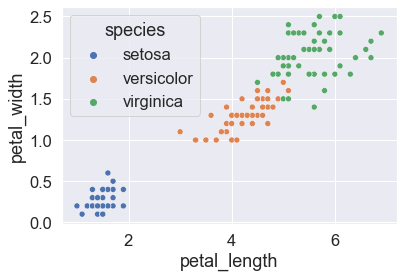

In [63]:
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species");
#fig = plt.gcf()
#fig.savefig("iris_scatter_plot_with_petal_data.png", dpi=300, bbox_inches = "tight")

In [64]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(multi_class = 'ovr')
logistic_regression_model = logistic_regression_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

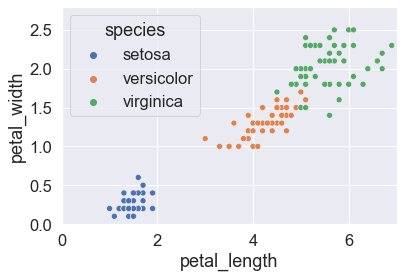

In [65]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
#cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species")
plt.xlim(0, 7)
plt.ylim(0, 2.8);
# plt.savefig("iris_decision_boundaries_logistic_regression_no_boundaries.png", dpi=300, bbox_inches = "tight")

## Decision Tree Classification

In [66]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(iris_data[["petal_length", "petal_width"]], iris_data["species"])

In [67]:
four_random_rows = iris_data.sample(4)
four_random_rows

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
64,5.6,2.9,3.6,1.3,versicolor
137,6.4,3.1,5.5,1.8,virginica
14,5.8,4.0,1.2,0.2,setosa


In [68]:
decision_tree_model.predict(four_random_rows[["petal_length", "petal_width"]])

array(['virginica', 'versicolor', 'virginica', 'setosa'], dtype=object)

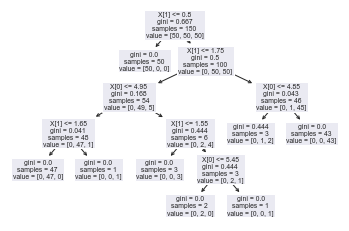

In [69]:
 tree.plot_tree(decision_tree_model);

In [70]:
#!pip install graphviz

# if you still have errors, 
# install graphviz in Anaconda Prompt
#conda install graphviz

# install graphviz by pip in Anaconda Prompt
# pip install graphviz

# set folder path as environmant variable path
# controll panel -> system environment
# go detail setting tab
# GO environment variable
# Go Path in system environment variable
# click edit
# add path
## if you use virtual env, "C:\Users\<your name>\Anaconda3\envs\<virtual env name>\Library\bin\graphviz
## if you dont use virtual env, "C:\Users\<your name>\Anaconda3\Library\bin\graphviz"
# restart PC
# if something does not work out, pip uninstall graphviz in Anaconda prompt. Then, !pip install graphviz here again.

## reference https://kazusa-pg.com/python-install-graphviz/

In [71]:
import graphviz

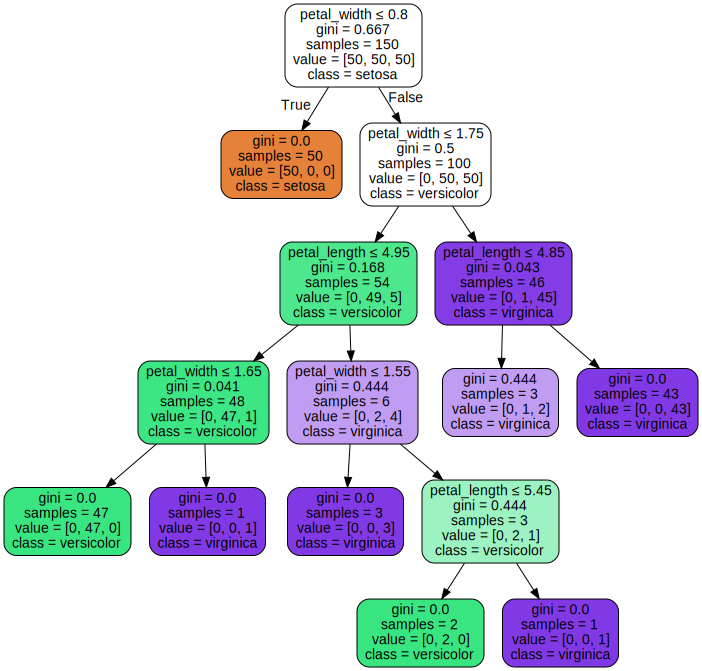

In [72]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=["petal_length", "petal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(format="png", filename="iris_tree.png")
graph

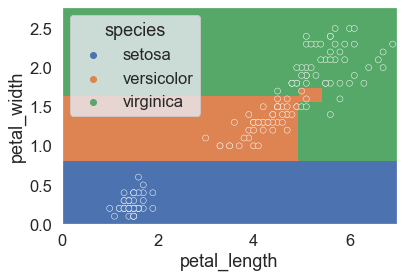

In [73]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species");
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries.png", dpi=300, bbox_inches = "tight")

In [74]:
from sklearn.metrics import accuracy_score
predictions = decision_tree_model.predict(iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, iris_data["species"])

0.9933333333333333

In [75]:
iris_data.query("petal_length > 2.45 and petal_width > 1.75 and petal_length <= 4.85")

,sepal_length,sepal_width,petal_length,petal_width,species
70,5.9,3.2,4.8,1.8,versicolor
126,6.2,2.8,4.8,1.8,virginica
138,6.0,3.0,4.8,1.8,virginica


## Overfitting

In [76]:
train_iris_data, test_iris_data = np.split(iris_data.sample(frac=1), [110])

In [77]:
#sort so that the color labels match what we had in the earlier part of lecture
train_iris_data = train_iris_data.sort_values(by="species")
test_iris_data = test_iris_data.sort_values(by="species")

In [78]:
len(train_iris_data)

110

In [79]:
train_iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
12,4.8,3.0,1.4,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
5,5.4,3.9,1.7,0.4,setosa
34,4.9,3.1,1.5,0.1,setosa
24,4.8,3.4,1.9,0.2,setosa


In [80]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(train_iris_data[["petal_length", "petal_width"]], train_iris_data["species"])

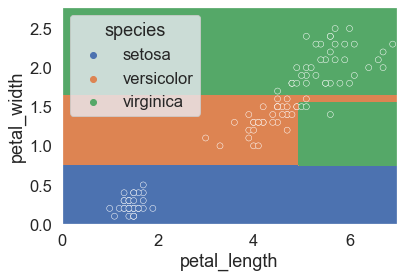

In [81]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "petal_length", y="petal_width", hue="species");
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_training_only.png", dpi=300, bbox_inches = "tight")

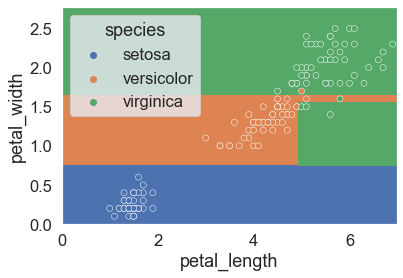

In [82]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = iris_data, x = "petal_length", y="petal_width", hue="species");
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

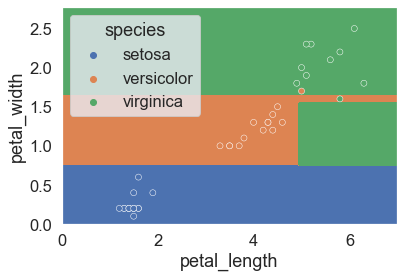

In [83]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(0, 7, 0.02),
                     np.arange(0, 2.8, 0.02))

Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "petal_length", y="petal_width", hue="species");
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split_test_only.png", dpi=300, bbox_inches = "tight")

In [84]:
accuracy_score(decision_tree_model.predict(train_iris_data[["petal_length", "petal_width"]]), train_iris_data["species"])

0.990909090909091

In [85]:
predictions = decision_tree_model.predict(test_iris_data[["petal_length", "petal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.95

In [86]:
from sklearn import tree
sepal_decision_tree_model = tree.DecisionTreeClassifier()
sepal_decision_tree_model = decision_tree_model.fit(train_iris_data[["sepal_length", "sepal_width"]], train_iris_data["species"])

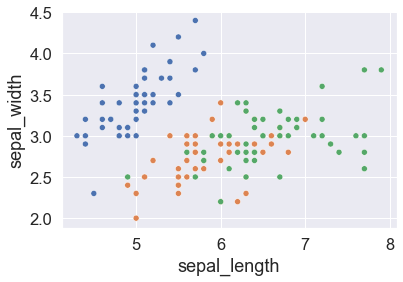

In [87]:
sns.scatterplot(data = iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);
# fig = plt.gcf()
# fig.savefig("iris_scatter_plot_with_petal_data_sepal_only.png", dpi=300, bbox_inches = "tight")

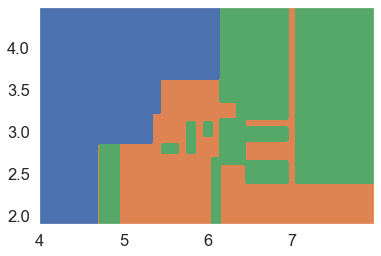

In [88]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
plt.contourf(xx, yy, Z_int, cmap=sns_cmap);
# fig = plt.gcf()
# fig.savefig("iris_sepal_decision_boundaries_no_data.png", dpi=300, bbox_inches = "tight")

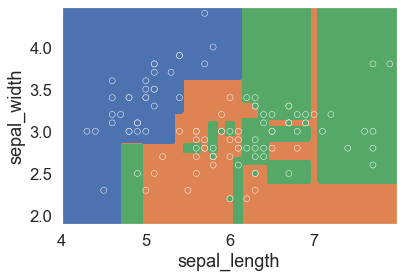

In [89]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = train_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);
# fig = plt.gcf()
# fig.savefig("iris_sepal_decision_boundaries_model_training_only.png", dpi=300, bbox_inches = "tight")

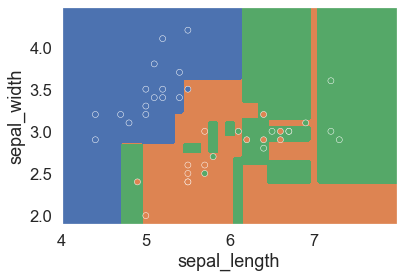

In [90]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

Z_string = sepal_decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
categories, Z_int = np.unique(Z_string, return_inverse=True)
Z_int = Z_int 
Z_int = Z_int.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
sns.scatterplot(data = test_iris_data, x = "sepal_length", y="sepal_width", hue="species", legend=False);
# fig = plt.gcf()
# fig.savefig("iris_sepal_decision_boundaries_model_test_only.png", dpi=300, bbox_inches = "tight")
#fig = plt.gcf()
#fig.savefig("iris_decision_boundaries_model_train_test_split.png", dpi=300, bbox_inches = "tight")

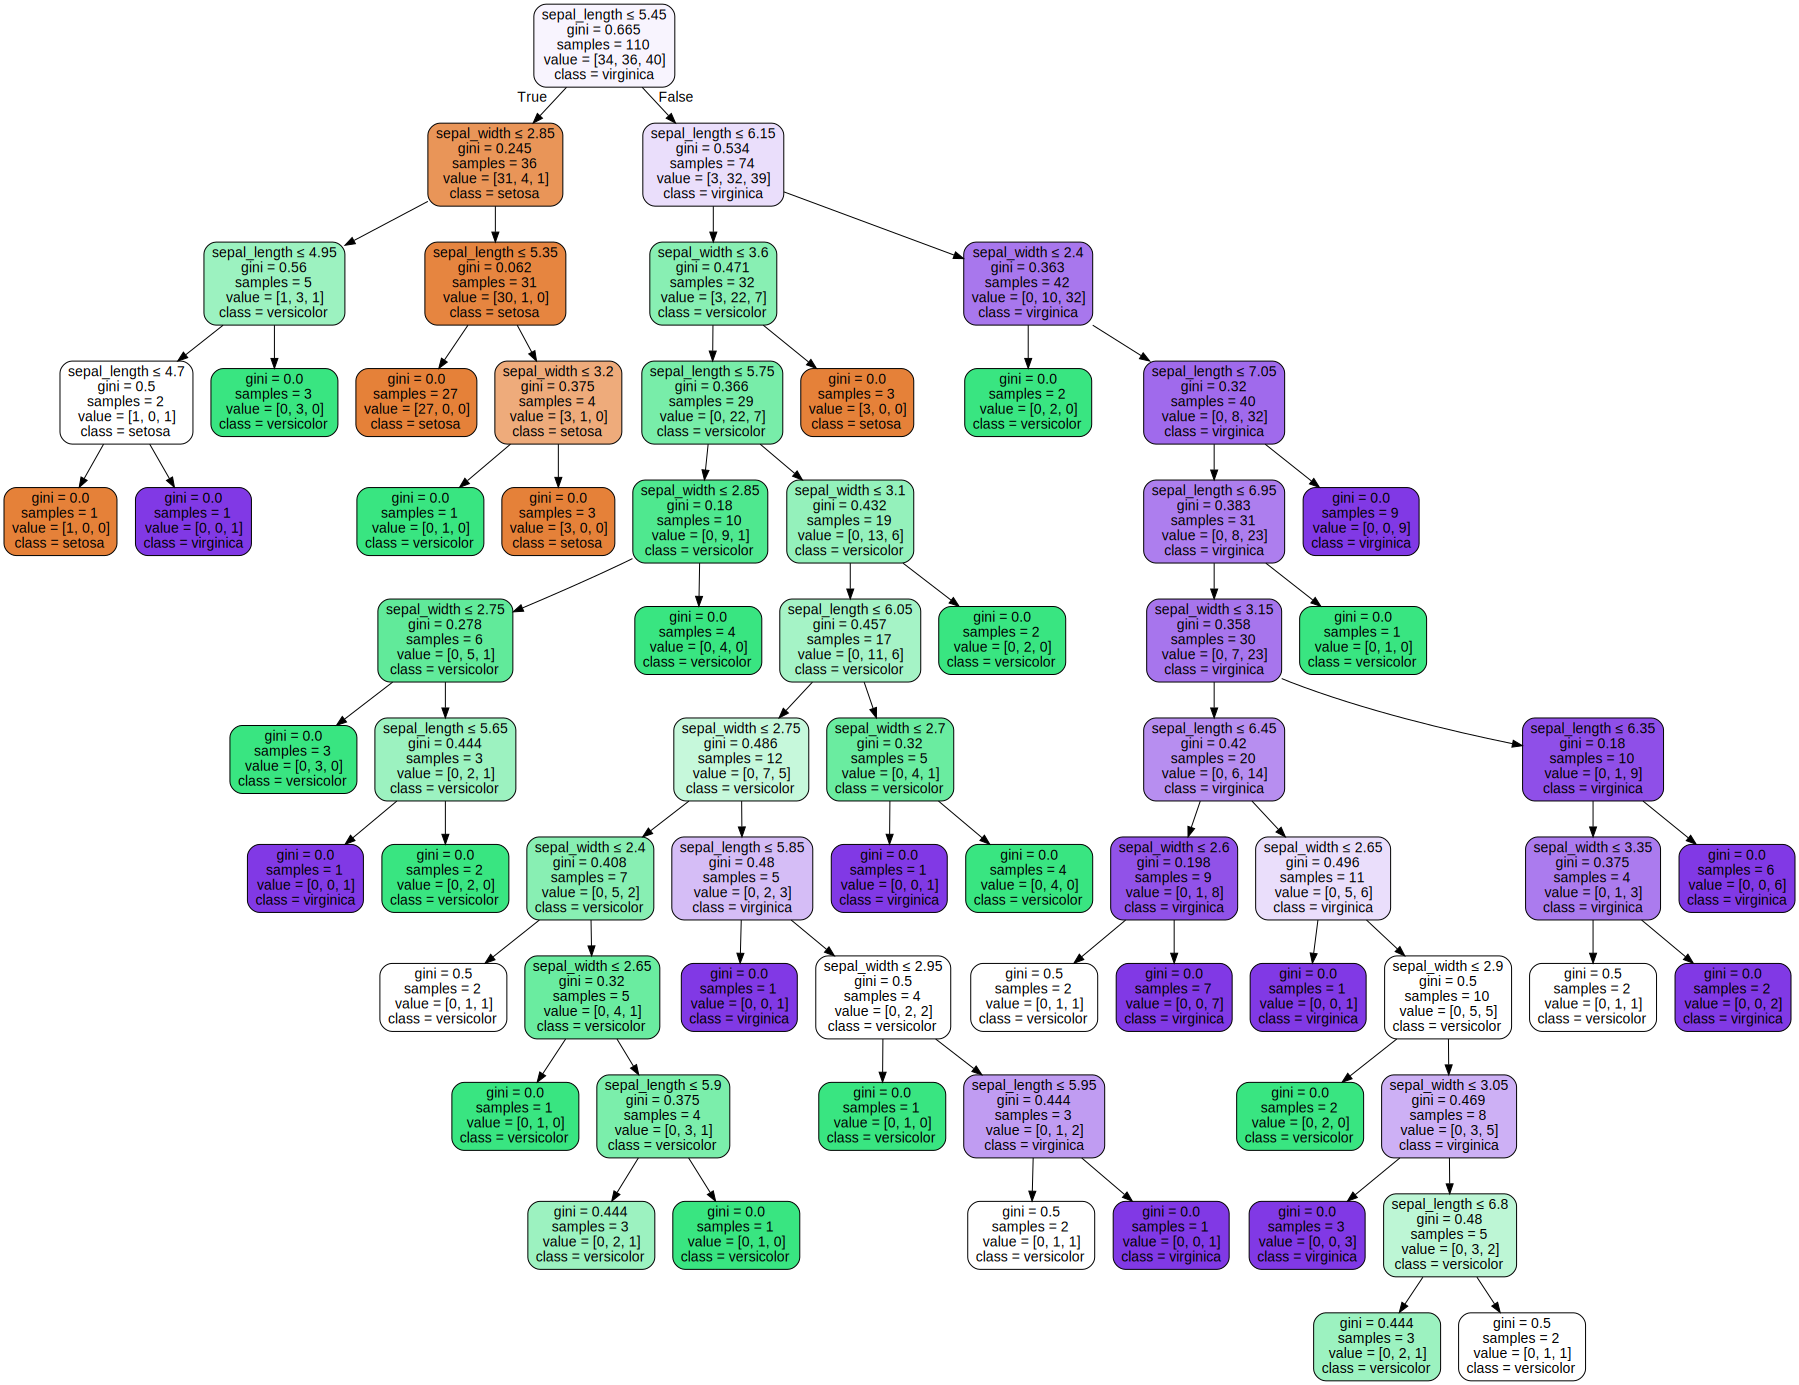

In [91]:
dot_data = tree.export_graphviz(sepal_decision_tree_model, out_file=None, 
                      feature_names=["sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
# graph.render(format="png", filename="sepal_tree")
graph

In [34]:
accuracy_score(sepal_decision_tree_model.predict(train_iris_data[["sepal_length", "sepal_width"]]), train_iris_data["species"])

0.9363636363636364

In [35]:
accuracy_score(sepal_decision_tree_model.predict(test_iris_data[["sepal_length", "sepal_width"]]), test_iris_data["species"])

0.7

In [36]:
decision_tree_model_4d = tree.DecisionTreeClassifier()
decision_tree_model_4d = decision_tree_model_4d.fit(train_iris_data[["petal_length", "petal_width", 
                                                                     "sepal_length", "sepal_width"]], train_iris_data["species"])

In [37]:
predictions = decision_tree_model_4d.predict(train_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, train_iris_data["species"])

1.0

In [38]:
predictions = decision_tree_model_4d.predict(test_iris_data[["petal_length", "petal_width", "sepal_length", "sepal_width"]])
accuracy_score(predictions, test_iris_data["species"])

0.95

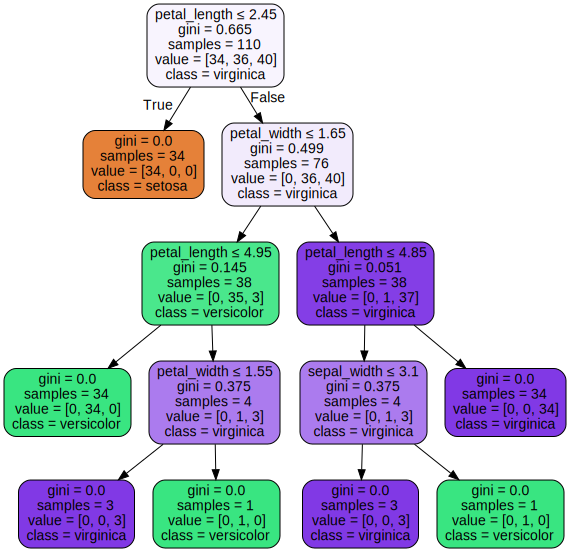

In [39]:
dot_data = tree.export_graphviz(decision_tree_model_4d, out_file=None, 
                      feature_names=["petal_length", "petal_width", "sepal_length", "sepal_width"],  
                      class_names=["setosa", "versicolor", "virginica"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [40]:
# graph.render(format="png", filename="iris_4d_tree")

### Creating Decision Trees

In [41]:
def entropy(x):
    normalized_x = x / np.sum(x)
    return sum(-normalized_x * np.log2(normalized_x))

In [42]:
-np.log2(0.33)*0.33

0.5278224832373695

In [43]:
-np.log2(0.36)*0.36

0.5306152277996684

In [44]:
entropy([34, 36, 40])

1.581649163979848

In [45]:
entropy([149, 1, 1])

0.11485434496175385

In [46]:
entropy([50, 50])

1.0

In [47]:
entropy([50, 50, 50])

1.584962500721156

In [48]:
entropy([31, 4, 1])

0.6815892897202809

In [49]:
#entropy([50, 46, 3])
#entropy([4, 47])
#entropy([41, 50])
#entropy([50, 50])

In [50]:
def weighted_average_entropy(x1, x2):
    N1 = sum(x1)
    N2 = sum(x2)
    N = N1/(N1 + N2)
    return (N1 * entropy(x1) + N2 * entropy(x2)) / (N1 + N2)

In [51]:
weighted_average_entropy([50, 46, 3], [4, 47])

0.9033518322003758

In [52]:
weighted_average_entropy([50, 9], [41, 50])

0.8447378399375686

In [53]:
weighted_average_entropy([2, 50, 50], [48])

0.761345106024134

In [54]:
weighted_average_entropy([50, 50], [50])

0.6666666666666666

### Random Forests

In [55]:
ten_decision_tree_models = []
ten_training_sets = []
for i in range(10):
    current_model = tree.DecisionTreeClassifier()
    temp_iris_training_data, temp_iris_test_data = np.split(iris_data.sample(frac=1), [110])
    temp_iris_training_data = temp_iris_training_data.sort_values("species")
    current_model.fit(temp_iris_training_data[["sepal_length", "sepal_width"]], temp_iris_training_data["species"])
    ten_decision_tree_models.append(current_model)
    ten_training_sets.append(temp_iris_training_data)

In [56]:
def plot_decision_tree(decision_tree_model, data = None, disable_axes = False):
    from matplotlib.colors import ListedColormap
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:3, :])

    xx, yy = np.meshgrid(np.arange(4, 8, 0.02),
                     np.arange(1.9, 4.5, 0.02))

    Z_string = decision_tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)
    if data is not None:
        sns.scatterplot(data = data, x = "sepal_length", y="sepal_width", hue="species", legend=False)

    if disable_axes:
        plt.axis("off")
#    if disable_axes:
#        
#        plt.gca().xaxis.label.set_visible(False)
#        plt.gca().yaxis.label.set_visible(False)        

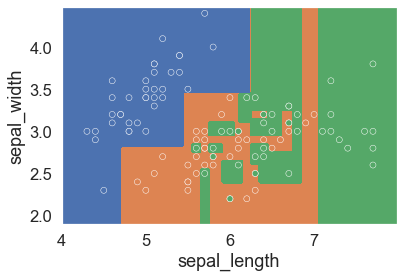

In [57]:
m_num = 0
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])
# plt.savefig("random_forest_model_1_example.png", dpi = 300, bbox_inches = "tight")

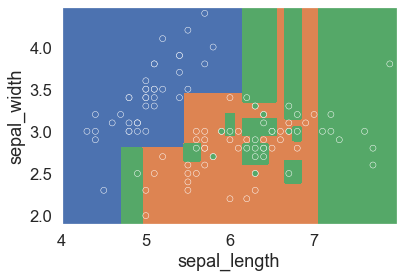

In [58]:
m_num = 7
plot_decision_tree(ten_decision_tree_models[m_num], ten_training_sets[m_num])
# plt.savefig("random_forest_model_2_example.png", dpi = 300, bbox_inches = "tight")

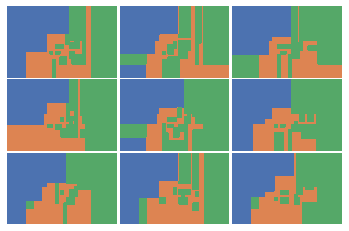

In [59]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(3, 3)
gs1.update(wspace=0.025, hspace=0.025) # set the spacing between axes. 

for i in range(0, 9):
    plt.subplot(gs1[i]) #3, 3, i)
    plot_decision_tree(ten_decision_tree_models[i], None, True)    
    
# plt.savefig("random_forest_model_9_examples.png", dpi = 300, bbox_inches = "tight")    